# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Who:
Researchers working in the field of (breast) cancer studies, as the dataset provides key information related to patient demographics, tumor characteristics, and treatment outcomes.
Medical professionals who might want to understand trends in surgery types, patient statuses, and tumor stages to inform clinical practices.
Data scientists conducting hypothesis testing and statistical analysis related to cancer treatment, patient survival, or the expression levels of proteins.
Lastly, students or beginners in data analysis who are learning to work with real-world medical datasets.

What:
The purpose of this dataset is to provide data for hypothesis testing and statistical analysis to study the relationships between different variables such as protein expressions, tumor stage, and patient survival.
Support research in understanding the factors that affect patient survival, tumor types, and treatment outcomes after surgery.
Analyze trends and correlations between surgery types, cancer stages, and patient survival outcomes as well as the possible influence of proteins and cancer receptors.
Help draw conclusions regarding the effectiveness of different treatments based on the status of the patient after surgery.

How:
Statistical Analysis: The dataset can be used to run statistical tests to explore associations between different factors, like age, tumor stage, protein expression, and patient outcomes.
Hypothesis Testing: The dataset can be used to test different hypotheses.
Data Visualization: Data visualization tools like bar charts, histograms, or survival curves could help visualize trends in the data.
Machine Learning/Modeling: This dataset can be used for predictive modeling such as predicting patient survival status based on the available variables.

# 3. Homework - work with your own data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [3]:
df = pd.read_csv('BRCA.csv')

print(df.head())


     Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD  36.0  FEMALE  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX  43.0  FEMALE -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079  69.0  FEMALE  0.213980   1.31140  -0.32747 -0.234260   
3  TCGA-D8-A1XR  56.0  FEMALE  0.345090  -0.21147  -0.19304  0.124270   
4  TCGA-BH-A0BF  56.0  FEMALE  0.221550   1.90680   0.52045 -0.311990   

  Tumour_Stage                      Histology ER status PR status HER2 status  \
0          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
1           II             Mucinous Carcinoma  Positive  Positive    Negative   
2          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
3           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
4           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   

                  Surgery_type Date_of_Surgery Date_of_Last_Visit  \
0  Mo

In [8]:
#Summarize the datasets using info() and describe()

df = pd.read_csv('BRCA.csv')

df_cleaned = df.dropna(how='all')

df.info()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


In [9]:
#Are there any duplicate rows?

duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

    Patient_ID  Age Gender  Protein1  Protein2  Protein3  Protein4  \
335        NaN  NaN    NaN       NaN       NaN       NaN       NaN   
336        NaN  NaN    NaN       NaN       NaN       NaN       NaN   
337        NaN  NaN    NaN       NaN       NaN       NaN       NaN   
338        NaN  NaN    NaN       NaN       NaN       NaN       NaN   
339        NaN  NaN    NaN       NaN       NaN       NaN       NaN   
340        NaN  NaN    NaN       NaN       NaN       NaN       NaN   

    Tumour_Stage Histology ER status PR status HER2 status Surgery_type  \
335          NaN       NaN       NaN       NaN         NaN          NaN   
336          NaN       NaN       NaN       NaN         NaN          NaN   
337          NaN       NaN       NaN       NaN         NaN          NaN   
338          NaN       NaN       NaN       NaN         NaN          NaN   
339          NaN       NaN       NaN       NaN         NaN          NaN   
340          NaN       NaN       NaN       NaN         NaN 

Are there any duplicate values in a given column (when this would be inappropriate?)

Yes, there are a series of rows where the values are entirely missing (NaN values). These rows are essentially "empty" entries, and they are being counted as duplicate entries.
This would be inappropriate when you know data is supposed to be unique. For example, in this dataset, the most important column to check for duplicates is Patient_ID, as it should be unique for each patient. If there are any duplicate values in Patient_ID, that would indicate an issue with the dataset.

In [12]:
#What are the mean, median, and mode of each column?

numeric_columns = df.select_dtypes(include=[np.number])

mean_values = numeric_columns.mean()

median_values = numeric_columns.median()

mode_values = numeric_columns.mode().iloc[0]

print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nMode values:\n", mode_values)


Mean values:
 Age         58.886228
Protein1    -0.029991
Protein2     0.946896
Protein3    -0.090204
Protein4     0.009819
dtype: float64

Median values:
 Age         58.000000
Protein1     0.006129
Protein2     0.992805
Protein3    -0.173180
Protein4     0.041768
dtype: float64

Mode values:
 Age         59.00000
Protein1     0.00000
Protein2    -0.97873
Protein3    -1.62740
Protein4    -0.35070
Name: 0, dtype: float64


In [13]:
#Are there any missing or null values?

missing_values = df.isnull().sum()
print(missing_values)

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64


Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

Ideally, you don't want to remove the row because it reduces the dataset size, potentially removing important data, leading to biased results if the missing data is not randomly distributed.
For most columns, filling with the mean (numeric columns) or a placeholder like "Unknown" (categorical columns) is a reasonable choice when the missing values are not a lot, such as 7 out of 341 rows, which helps preserve the dataset size.

In [14]:
#Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

invalid_dates = df[df['Date_of_Surgery'] > datetime.now().strftime('%d-%b-%Y')]
print(invalid_dates)

       Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
1    TCGA-EW-A1OX  43.0  FEMALE -0.420320   0.57807  0.614470 -0.031505   
3    TCGA-D8-A1XR  56.0  FEMALE  0.345090  -0.21147 -0.193040  0.124270   
5    TCGA-AO-A1KQ  84.0    MALE -0.081872   1.72410 -0.057335  0.043025   
8    TCGA-EW-A1P5  77.0  FEMALE -0.151750  -0.66332  1.189400  0.217180   
10   TCGA-S3-A6ZG  71.0  FEMALE -0.223050   0.50594 -0.349430 -0.835300   
..            ...   ...     ...       ...       ...       ...       ...   
318  TCGA-A2-A0SU  66.0  FEMALE -0.370430   1.91850 -0.796080 -0.062903   
323  TCGA-AO-A1KP  77.0  FEMALE  0.339120   1.31930  0.587400  0.351920   
325  TCGA-BH-A0BV  78.0  FEMALE -0.917230  -0.64693  0.552590  0.458740   
327  TCGA-E2-A1B5  46.0  FEMALE -0.055036  -0.50643  0.887780 -0.089424   
332  TCGA-A2-A0EU  79.0  FEMALE  0.479400   2.05590 -0.531360 -0.188480   

    Tumour_Stage                       Histology ER status PR status  \
1             II           

In [15]:
#Encode any categorical variables (e.g. with one-hot encoding.)

df_encoded = pd.get_dummies(df, columns=['Gender', 'Surgery_type', 'ER status', 'Histology'])


Conclusions:

-Are the data usable? If not, find some new data!
The dataset appears to be mostly usable, with some issues that need attention:
There are a few missing values across various columns, but these are not overwhelmingly large in number with the exception of Date_of_Last_Visit and Patient_Status which have some significant missing data.
Some rows contain entirely missing values for all columns, likely indicating incomplete or erroneous entries.
There are potential inconsistencies in columns like Date_of_Surgery (future dates), Age (unrealistically high or negative values), and Gender (potential invalid categories).

-Do you need to modify or correct the data in some way?
Yes, several modifications should be made:
Handling missing data: Some missing data needs to be addressed. This can be through filling the missing values with reasonable estimates such as the mean (for numeric data) or the most frequent category (for categorical data), or through dropping rows with critical missing values.
Correcting inconsistent data:
We also need to correct any invalid or future dates in Date_of_Surgery and Date_of_Last_Visit. Correct unrealistic ages or any cases where a patient is recorded as being younger than their age at the time of surgery. Also remove duplicate rows because several rows in the dataset are entirely NaN values (likely duplicates or invalid entries) that should be removed to avoid impacting the analysis.

-Is there any class imbalance? (Categories that have many more items than other categories).
We can check for class imbalance specifically in some important columns:

In [16]:
categorical_columns = ['Tumour_Stage', 'ER status', 'PR status', 'Patient_Status']
for col in categorical_columns:
    print(df[col].value_counts())

Tumour_Stage
II     189
III     81
I       64
Name: count, dtype: int64
ER status
Positive    334
Name: count, dtype: int64
PR status
Positive    334
Name: count, dtype: int64
Patient_Status
Alive    255
Dead      66
Name: count, dtype: int64


In [17]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print()

Value counts for Patient_ID:
Patient_ID
TCGA-B6-A40B    1
TCGA-D8-A1XD    1
TCGA-EW-A1OX    1
TCGA-A8-A079    1
TCGA-D8-A1XR    1
               ..
TCGA-BH-A0DE    1
TCGA-EW-A1PA    1
TCGA-A2-A0D4    1
TCGA-AO-A03V    1
TCGA-C8-A8HQ    1
Name: count, Length: 334, dtype: int64

Value counts for Gender:
Gender
FEMALE    330
MALE        4
Name: count, dtype: int64

Value counts for Tumour_Stage:
Tumour_Stage
II     189
III     81
I       64
Name: count, dtype: int64

Value counts for Histology:
Histology
Infiltrating Ductal Carcinoma     233
Infiltrating Lobular Carcinoma     89
Mucinous Carcinoma                 12
Name: count, dtype: int64

Value counts for ER status:
ER status
Positive    334
Name: count, dtype: int64

Value counts for PR status:
PR status
Positive    334
Name: count, dtype: int64

Value counts for HER2 status:
HER2 status
Negative    305
Positive     29
Name: count, dtype: int64

Value counts for Surgery_type:
Surgery_type
Other                          105
Modified R

Based on this result, yes, we can observe the following class imbalances in the dataset:
Tumour_Stage has a slight imbalance.
Patient_Status has a more notable imbalance, with "Alive" significantly outnumbering "Dead."
ER status and PR status do not exhibit imbalance, but they both consist of only one category, which makes them less informative for analysis or modeling.
There is a large imbalance in the number of female vs. male patients. There are 330 females and only 4 males in the dataset. Normally, this would be concerning but in this type of data, breast cancer primarily affects women so it is okay in this case.
The dataset shows more patients with Tumour Stage II, followed by Stage III, and fewer with Stage I. The distribution seems reasonable for this kind of dataset, but the imbalance between Stage I and the other stages might require attention in modeling if we're trying to predict something related to tumour stage.

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

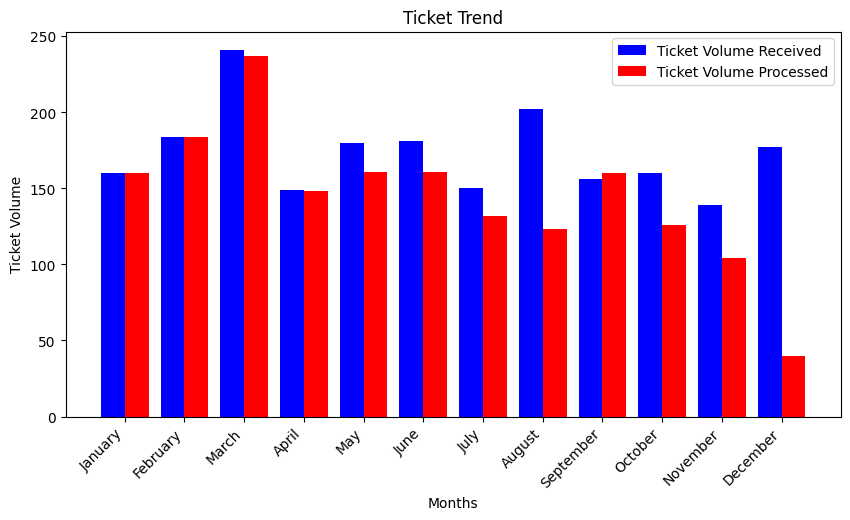

In [19]:
import matplotlib.pyplot as plt

months = ["January", "February", "March", "April", "May", "June", "July", "August", 
          "September", "October", "November", "December"]
ticket_received = [160, 184, 241, 149, 180, 181, 150, 202, 156, 160, 139, 177]
ticket_processed = [160, 184, 237, 148, 161, 161, 132, 123, 160, 126, 104, 40]

x = np.arange(len(months))
width = 0.4

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x - width/2, ticket_received, width, label="Ticket Volume Received", color='blue')
ax.bar(x + width/2, ticket_processed, width, label="Ticket Volume Processed", color='red')

ax.set_xlabel("Months")
ax.set_ylabel("Ticket Volume")
ax.set_title("Ticket Trend")
ax.set_xticks(x)
ax.set_xticklabels(months, rotation=45, ha="right")
ax.legend()

plt.show()
